In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Read the .csv files as pandas dataframe
train_raw = pd.read_csv('leaf.csv')
test_raw = pd.read_csv('leaftest.csv')

In [4]:
print('Number of samples for training model',train_raw.shape[0])

Number of samples for training model 990


In [5]:
print('number of samples for evaluating model',test_raw.shape[0])

number of samples for evaluating model 594


In [6]:
train_raw.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


- Train_raw dataset has the shape of [990x194]. 990 represents the number of species, and 194 represents individual features in columns i.e. 'id', 'species', 'margin1-64', 'shape1-64', 'texture1-64'.

More in detail for 194:

- id - an anonymous id unique to an image
- species - 99 species, not given in test.csv
- margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature
- shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature
- texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature

In [7]:
train_raw.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [33]:
object_columns = train_raw.select_dtypes(include='object').columns
print("Columns with 'object' data type:", object_columns)

Columns with 'object' data type: Index(['species'], dtype='object')


In [35]:
train_raw['species'].unique()

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

## Missing Value 

In [41]:
train_raw.isna().sum() #No missing value found!

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

## Outlier Detection

In [46]:
from scipy import stats
import numpy as np

# Drop the 'species' column and calculate z-scores
train_raw_no_species = train_raw.drop('species', axis=1)
z_scores = stats.zscore(train_raw_no_species)

# Identify outliers using a threshold (e.g., 3 standard deviations)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# Filter the original DataFrame to get rows with outliers
outlier_rows = train_raw[outliers]


In [49]:
outlier_rows #No outliers found

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64


## Lable encoding

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [9]:
# Preprocess the data to fit for the classifier
le = LabelEncoder().fit(train_raw.species) # Instantiate a LabelEncoder and fit to the given label data
labels = le.transform(train_raw.species)  # encode species strings and return labels with value between 0 and n_classes-1
classes = list(le.classes_)  # Save the species
test_ids = test_raw.id  # Save the image ids in test dataset

train = train_raw.drop(['id', 'species'], axis=1)
test = test_raw.drop(['id'], axis=1)

In [55]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, GridSearchCV

In [56]:
# construct the iterator
ss_split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
ss_split.get_n_splits(train, labels)

for train_index, test_index in ss_split.split(train, labels):   
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]   

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
from sklearn.metrics import accuracy_score, log_loss

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import cv2

%matplotlib inline

## Reading and Visualizing Leaf Images

In [ ]:
def leaf_image(image_id,target_length=160):
      """
    `image_id` should be the index of the image in the images/ folder
        
    Reture the image of a given id(1~1584) with the target size (target_length x target_length)
    
    """
    
    image_name = str(image_id) + '.jpg'
    leaf_img = plt.imread('images/'+image_name)  # Reading in the image 
    leaf_img_width = leaf_img.shape[1]
    leaf_img_height = leaf_img.shape[0]
    #target_length = 160
    img_target = np.zeros((target_length, target_length), np.uint8)
    if leaf_img_width >= leaf_img_height:
        scale_img_width = target_length
        scale_img_height = int( (float(scale_img_width)/leaf_img_width)*leaf_img_height )
        img_scaled = cv2.resize(leaf_img, (scale_img_width, scale_img_height), interpolation = cv2.INTER_AREA)
        copy_location = (target_length-scale_img_height)/2
        img_target[copy_location:copy_location+scale_img_height,:] = img_scaled
    else:
        # leaf_img_width < leaf_img_height:
        scale_img_height = target_length
        scale_img_width = int( (float(scale_img_height)/leaf_img_height)*leaf_img_width )
        img_scaled = cv2.resize(leaf_img, (scale_img_width, scale_img_height), interpolation = cv2.INTER_AREA)
        copy_location = (target_length-scale_img_width)/2
        img_target[:, copy_location:copy_location+scale_img_width] = img_scaled 
    
    return img_target


# Test the leaf_image function
leaf_id = 343
leaf_img = leaf_image(leaf_id, target_length=160); 

plt.imshow(leaf_img, cmap='gray')
plt.show()

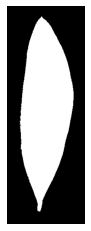

In [75]:
import cv2
import os
import matplotlib.pyplot as plt

def leaf_image(image_id, folder_path='images/'):
    image_name = str(image_id) + '.jpg'
    img_path = os.path.join(folder_path, image_name)
    img = cv2.imread(img_path)
    return img

# Example usage
image_id = 343
leaf_image = leaf_image(image_id)

# Display the image in the notebook
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [79]:
train_raw.species.unique()

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

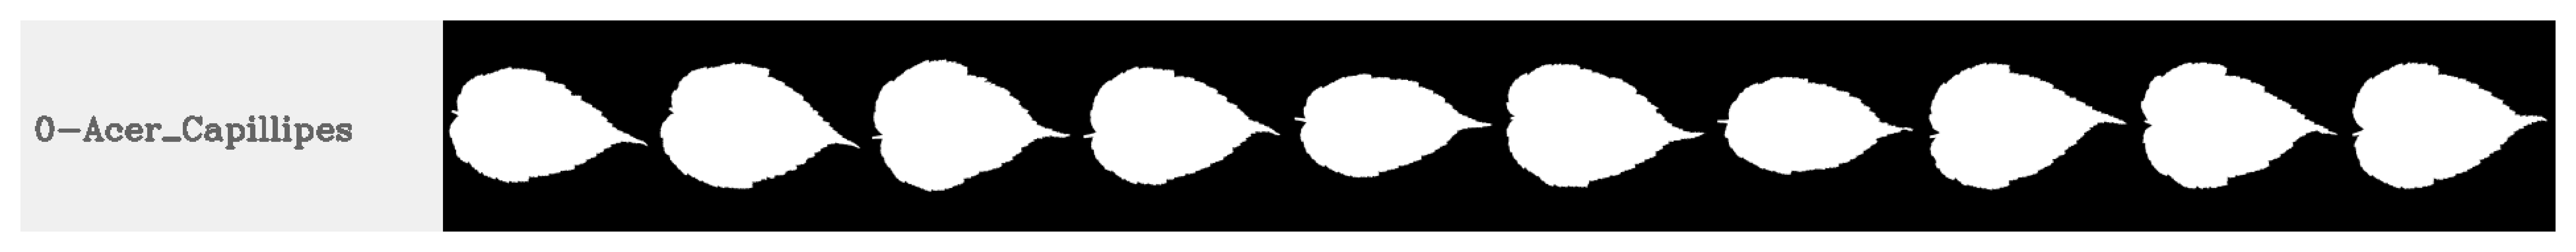

0-Acer_Capillipes


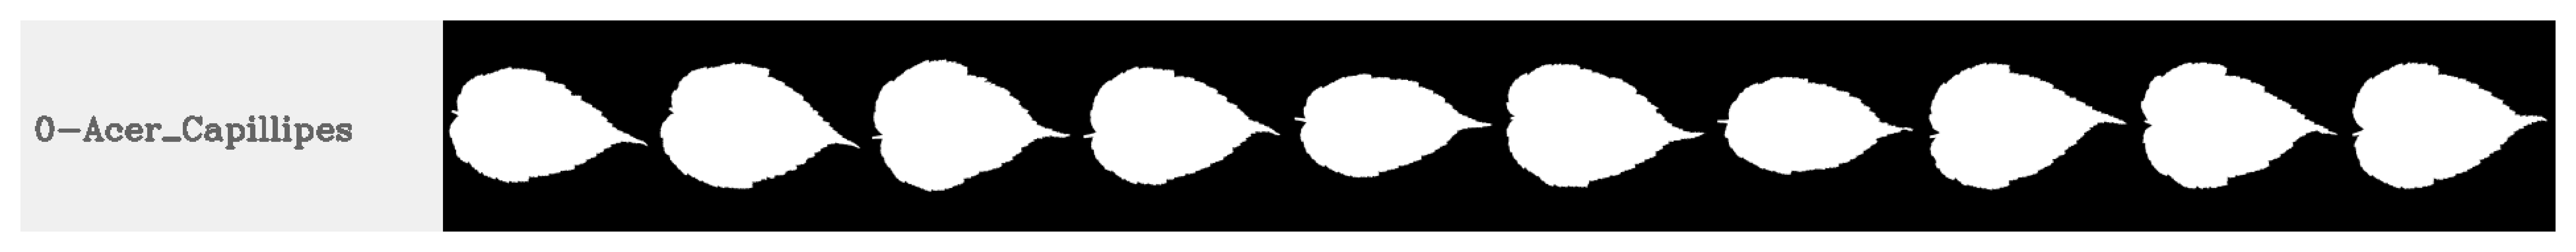

In [83]:
def species_image(species):
    """
    `species` should be the index or species name
        
    Returns an image of a certain labeled species
    """
    
    leaf_image_length = 160
    #img_target = np.zeros([leaf_image_length, 0], np.uint8)  # Initialization
    img_target = 240*np.ones([leaf_image_length, leaf_image_length*2], np.uint8)  # Initialization
    label_info = ''
    #if type(species)==int and species >= 0 and species < 99:
    if species >= 0 and species < 99:
        images_index = np.where(labels==species)[0]
        label_info = str(species) + '-' + train_raw.species[images_index[0]]
    elif type(species)==str and species in classes:
        images_index = np.where(train_raw.species==species)[0]
        label_info = str(images_index[0]) + '-' + species
    else:
        print ('Error: Please input a valid index or species name')
        return
    for image_index in images_index:
        image_id = train_raw.id[image_index]
        leaf_img = leaf_image(image_id)
        img_target = np.append(img_target, leaf_img, axis=1)
    
    # Add information onto the first block
    cv2.putText(img_target, label_info, (10,90), cv2.FONT_HERSHEY_COMPLEX, 0.8, (100,170,0), 2)
            
    return img_target, label_info
        
    
    
# Test the function
species_img, label_info = species_image(0)  # Show this species of given index(0~98)
fig = plt.figure(num=None, figsize=(16, 3), dpi=1200, facecolor='w', edgecolor='w',frameon=False,linewidth = 0)
plt.imshow(species_img, cmap='gray'); plt.axis('off'); plt.show()
print( label_info)
fig = plt.figure(num=None, figsize=(16, 3), dpi=1200, facecolor='w', edgecolor='w',frameon=False,linewidth = 0)
plt.imshow(species_img, cmap='gray'); plt.axis('off'); plt.show()


In [86]:
def visualize_error(train_predictions, y_test):
    """
    Review the images where mistakes occur
        
    """
    
    error_indices = np.where(train_predictions != y_test)[0]; print ('The error indices: ', error_indices)
    for err_index in error_indices[0:]: 
        print ('Error index in the test set: ', err_index)

        err_img_index = train_raw.id[test_index[err_index]]

        print ('Ground truth species index: {}'.format(y_test[err_index]))
        print ('Wrong predicting species index: {}'.format(train_predictions[err_index]))


        plt.imshow(leaf_image(err_img_index, 160), cmap='gray'); plt.axis('off'); plt.show()

        wrong_pred_species_img, label_info = species_image(train_predictions[err_index])
        fig = plt.figure(num=None, figsize=(16, 3), dpi=1200, facecolor='w', edgecolor='w',frameon=False,linewidth = 0)
        wrong_pred_species_img = cv2.cvtColor(wrong_pred_species_img,cv2.COLOR_GRAY2RGB)
        wrong_pred_species_img = cv2.copyMakeBorder(wrong_pred_species_img,10,10,10,10,cv2.BORDER_CONSTANT,value=[255,0,0])

        plt.imshow(wrong_pred_species_img, cmap='gray'); plt.axis('off'); plt.show()

        ground_truth_species_img, label_info = species_image(y_test[err_index])
        fig = plt.figure(num=None, figsize=(16, 3), dpi=1200, facecolor='w', edgecolor='w',frameon=False,linewidth = 0)
        plt.imshow(ground_truth_species_img, cmap='gray'); plt.axis('off'); plt.show()

        print ('#'*50)

In [88]:
# List and save all the classes
for i, class_ in enumerate(classes):
    species_img, label_info = species_image(i)  # Show this species of given index(0~98)
    print (label_info)
    cv2.imwrite('species/'+label_info+'.jpg', species_img)

0-Acer_Capillipes
1-Acer_Circinatum
2-Acer_Mono
3-Acer_Opalus
4-Acer_Palmatum
5-Acer_Pictum
6-Acer_Platanoids
7-Acer_Rubrum
8-Acer_Rufinerve
9-Acer_Saccharinum
10-Alnus_Cordata
11-Alnus_Maximowiczii
12-Alnus_Rubra
13-Alnus_Sieboldiana
14-Alnus_Viridis
15-Arundinaria_Simonii
16-Betula_Austrosinensis
17-Betula_Pendula
18-Callicarpa_Bodinieri
19-Castanea_Sativa
20-Celtis_Koraiensis
21-Cercis_Siliquastrum
22-Cornus_Chinensis
23-Cornus_Controversa
24-Cornus_Macrophylla
25-Cotinus_Coggygria
26-Crataegus_Monogyna
27-Cytisus_Battandieri
28-Eucalyptus_Glaucescens
29-Eucalyptus_Neglecta
30-Eucalyptus_Urnigera
31-Fagus_Sylvatica
32-Ginkgo_Biloba
33-Ilex_Aquifolium
34-Ilex_Cornuta
35-Liquidambar_Styraciflua
36-Liriodendron_Tulipifera
37-Lithocarpus_Cleistocarpus
38-Lithocarpus_Edulis
39-Magnolia_Heptapeta
40-Magnolia_Salicifolia
41-Morus_Nigra
42-Olea_Europaea
43-Phildelphus
44-Populus_Adenopoda
45-Populus_Grandidentata
46-Populus_Nigra
47-Prunus_Avium
48-Prunus_X_Shmittii
49-Pterocarya_Stenoptera

# Logistic Regression

In [94]:
param_grid = {'C': [ 1000, 10000],
              'tol': [0.000001, 0.00001]}
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
grid_search = GridSearchCV(log_reg, param_grid, scoring='neg_log_loss', refit='True', cv=ss_split)
grid_search.fit(X_train_scaled, y_train)

print ('Best parameter: {}'.format(grid_search.best_params_))
print ('Best cross-validation neg_log_loss score: {}'.format(grid_search.best_score_))
print ('\nBest estimator:\n{}'.format(grid_search.best_estimator_))

Best parameter: {'C': 1000, 'tol': 1e-06}
Best cross-validation neg_log_loss score: -0.05964779500124404

Best estimator:
LogisticRegression(C=1000, multi_class='multinomial', solver='newton-cg',
                   tol=1e-06)


In [95]:
print ('ML Model: Logistic Regression')
# Accuracy
train_predictions = grid_search.predict(X_test_scaled)
acc = accuracy_score(y_test, train_predictions)
print( 'Accuracy: {:.4%}'.format(acc))
# Logloss
train_predictions_p = grid_search.predict_proba(X_test_scaled)
ll = log_loss(y_test, train_predictions_p)
print( 'Log Loss: {:.6}'.format(ll))

ML Model: Logistic Regression
Accuracy: 98.4848%
Log Loss: 0.029714


The error indices:  [ 24 125 137]
Error index in the test set:  24
Ground truth species index: 48
Wrong predicting species index: 41


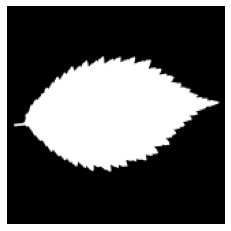

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


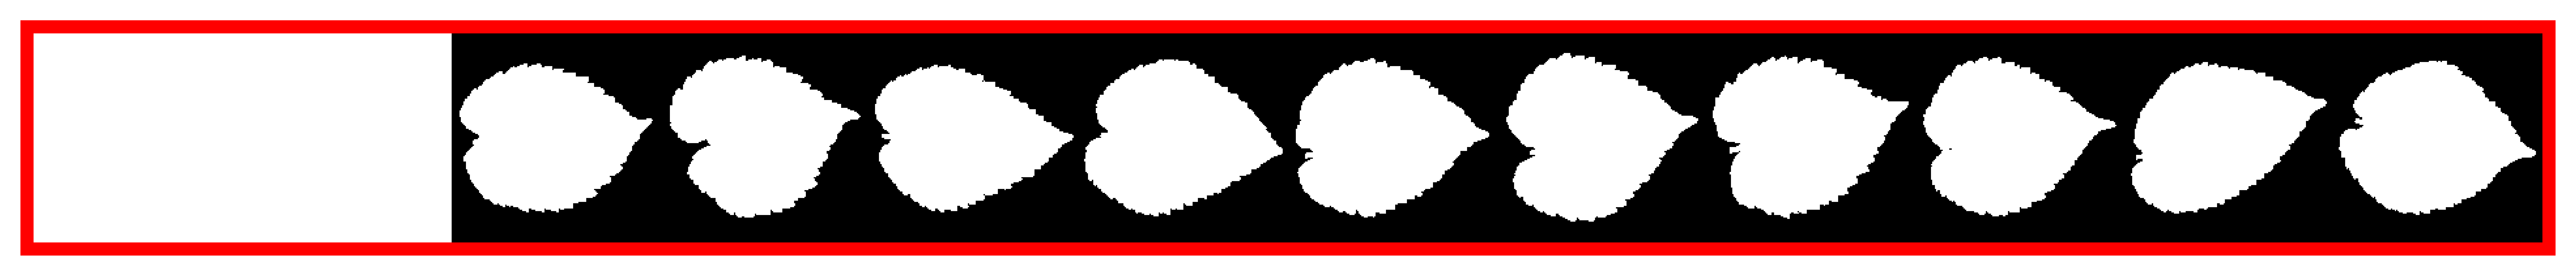

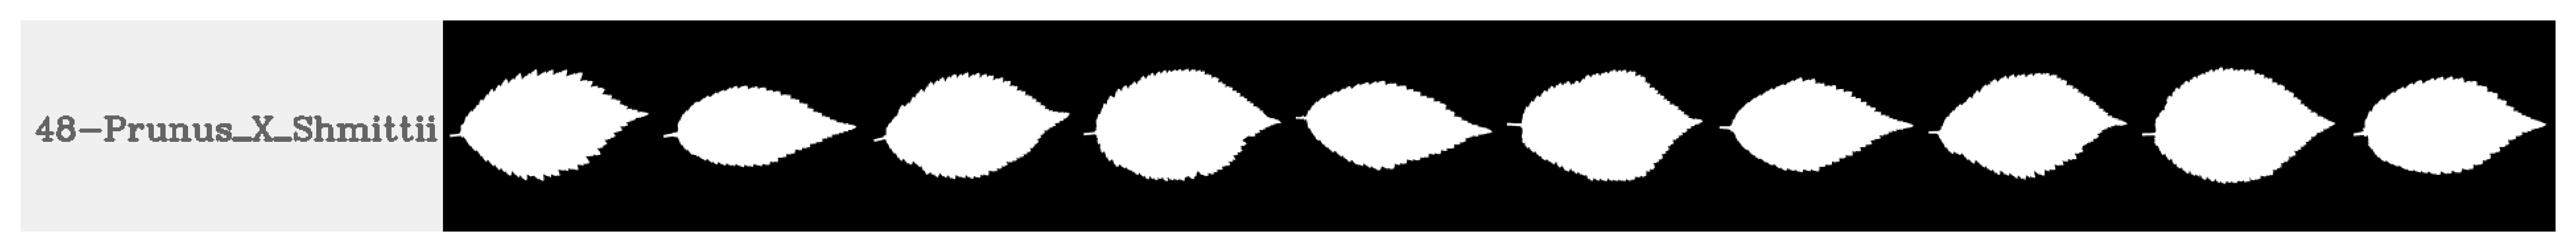

##################################################
Error index in the test set:  125
Ground truth species index: 29
Wrong predicting species index: 28


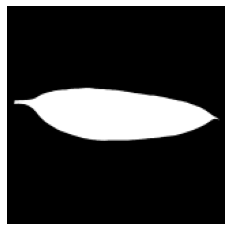

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


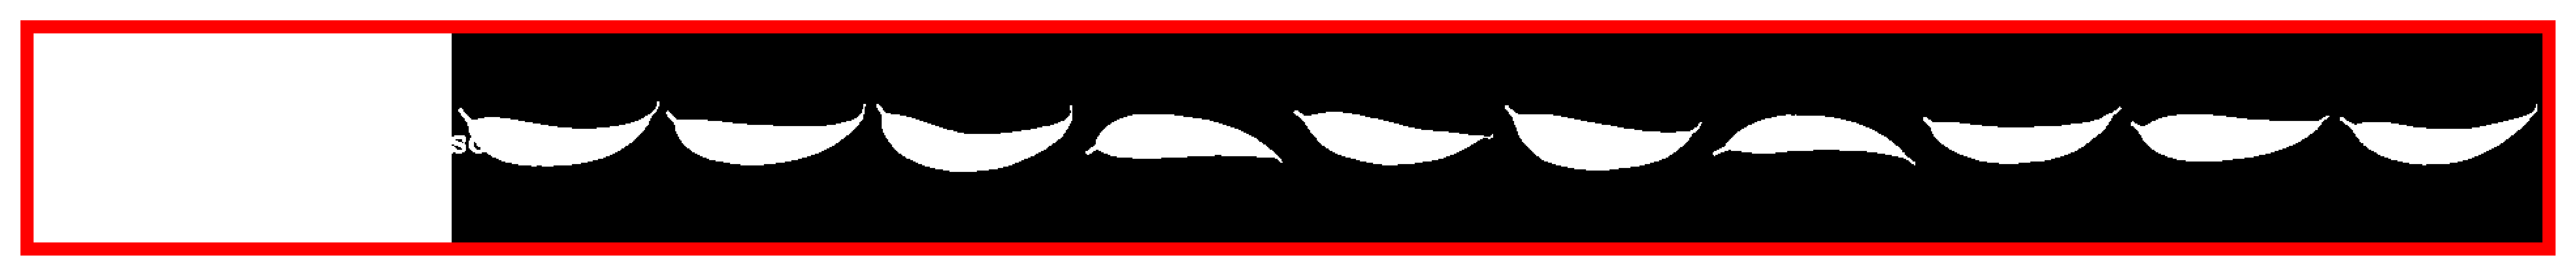

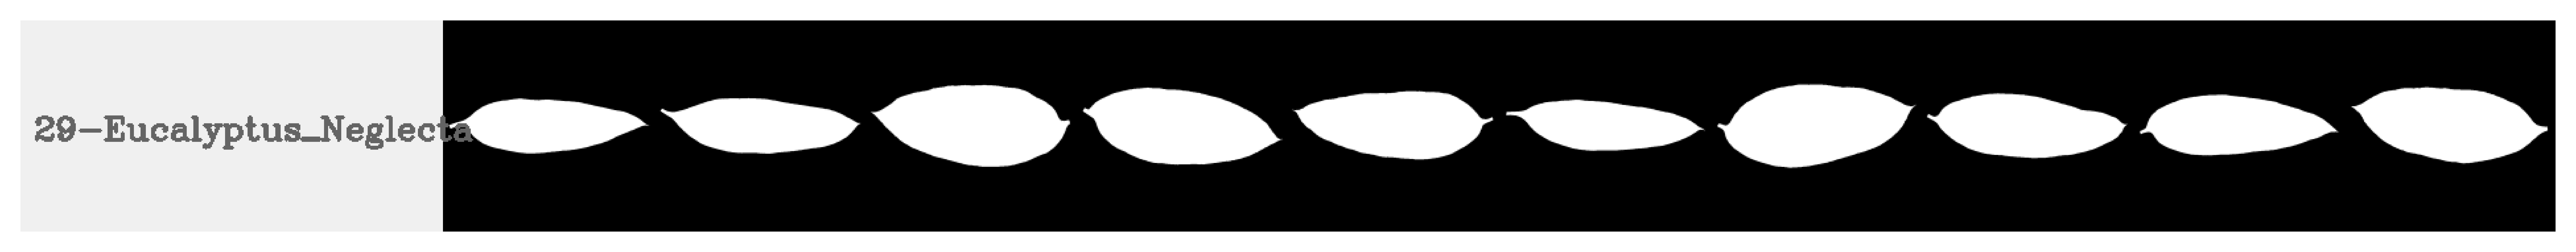

##################################################
Error index in the test set:  137
Ground truth species index: 18
Wrong predicting species index: 97


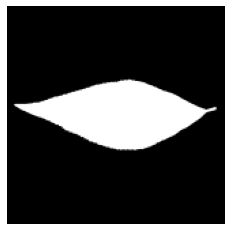

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


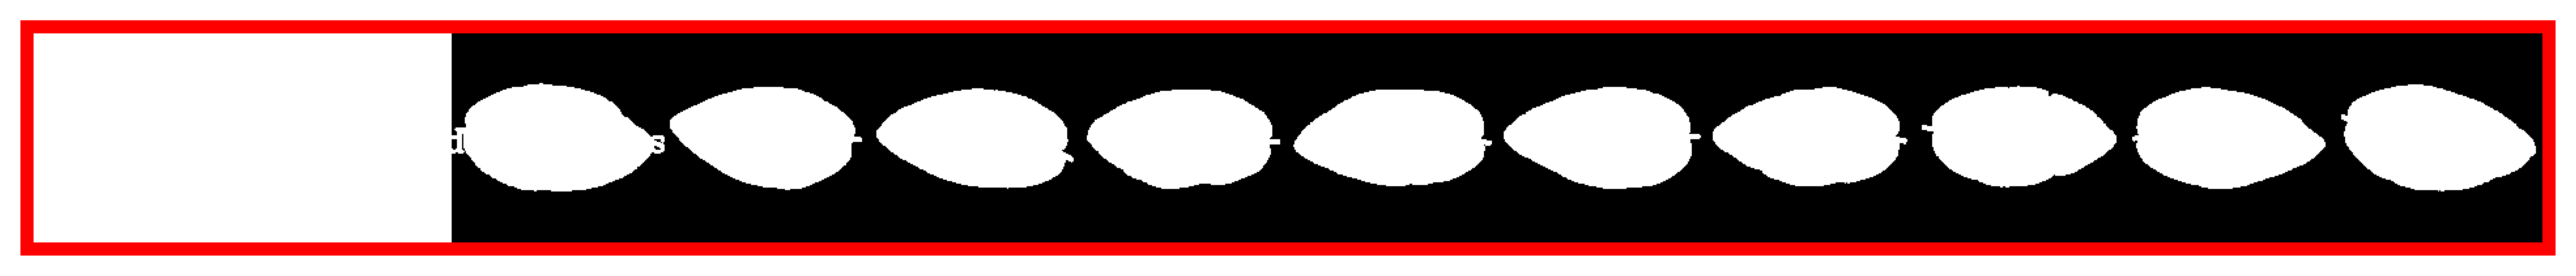

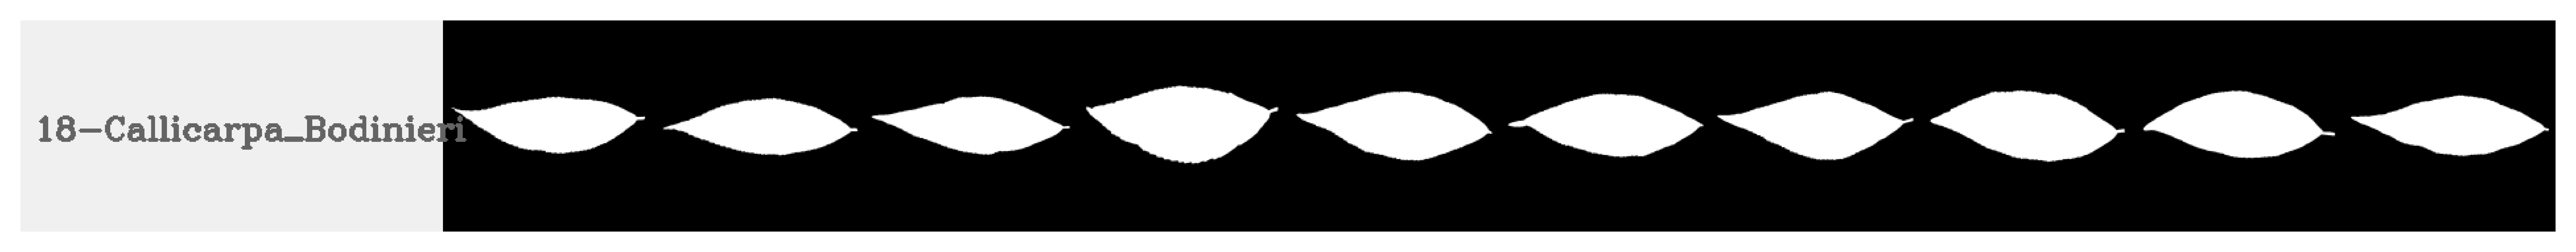

##################################################


In [96]:
visualize_error(train_predictions, y_test)

In [98]:
clf = LinearDiscriminantAnalysis().fit(X_train, y_train)
print ('ML Model: ', clf.__class__.__name__)

train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print ('Accuracy: {:.4%}'.format(acc))

train_predictions_p = clf.predict_proba(X_test)
ll = log_loss(y_test, train_predictions_p)
print ('Log Loss: {:.6}'.format(ll))

ML Model:  LinearDiscriminantAnalysis
Accuracy: 97.4747%
Log Loss: 0.51082


The error indices:  [ 17  24 138 141 197]
Error index in the test set:  17
Ground truth species index: 85
Wrong predicting species index: 3


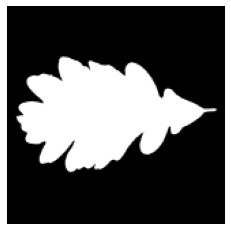

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


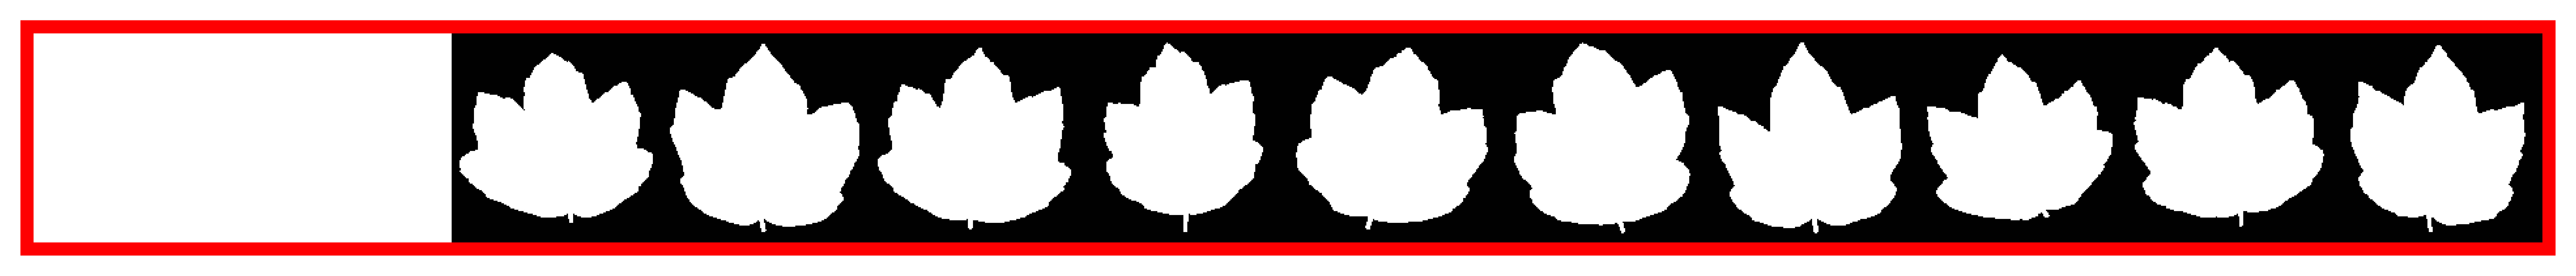

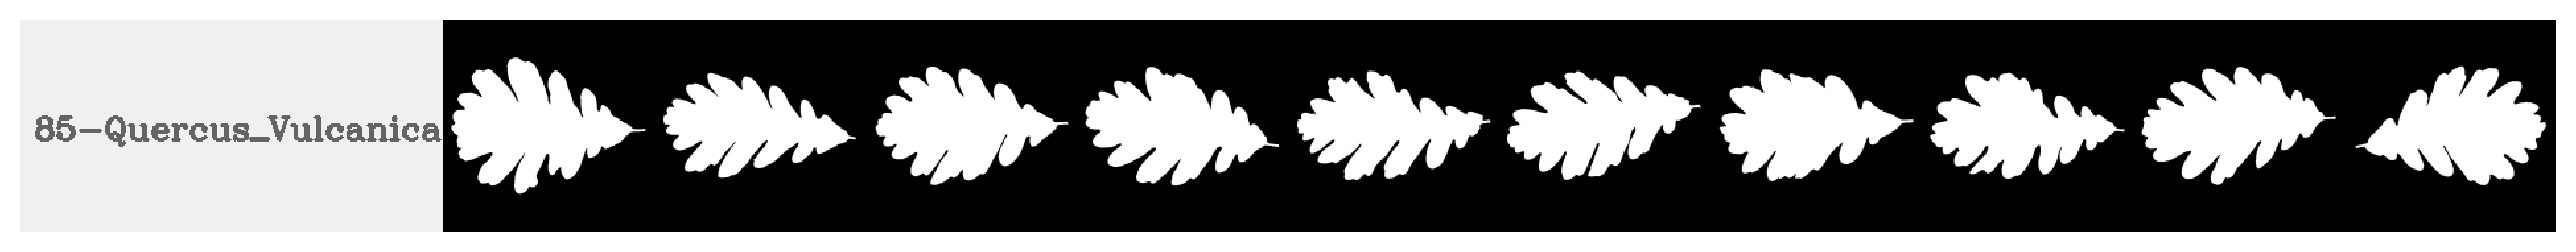

##################################################
Error index in the test set:  24
Ground truth species index: 48
Wrong predicting species index: 41


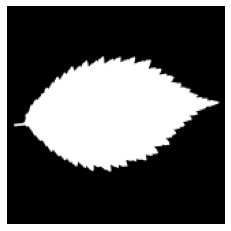

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


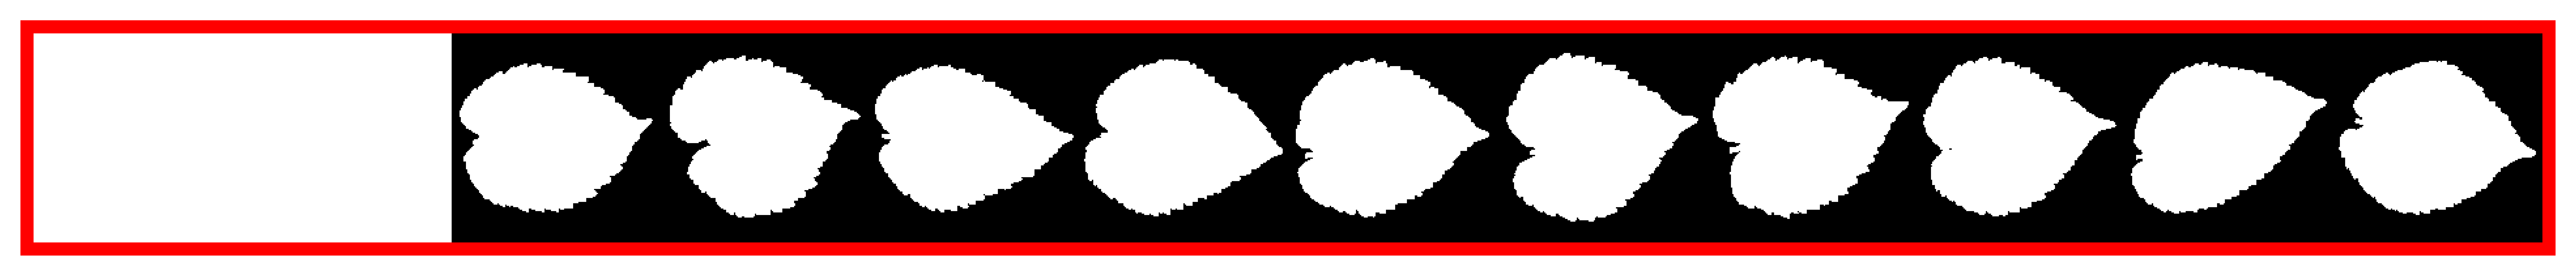

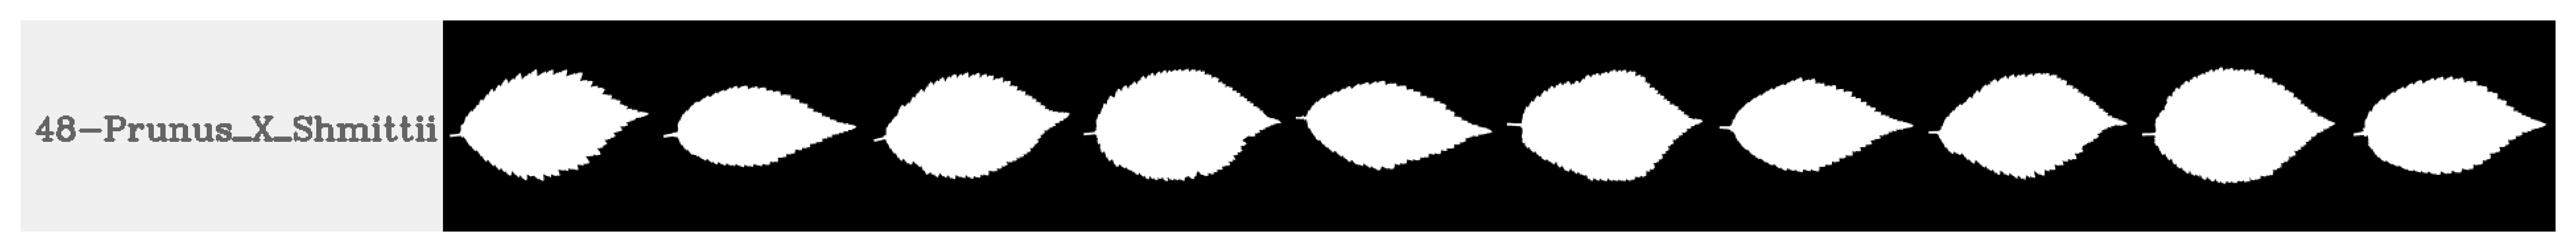

##################################################
Error index in the test set:  138
Ground truth species index: 63
Wrong predicting species index: 71


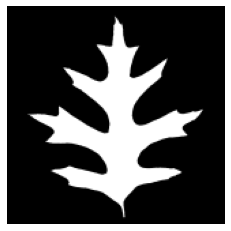

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


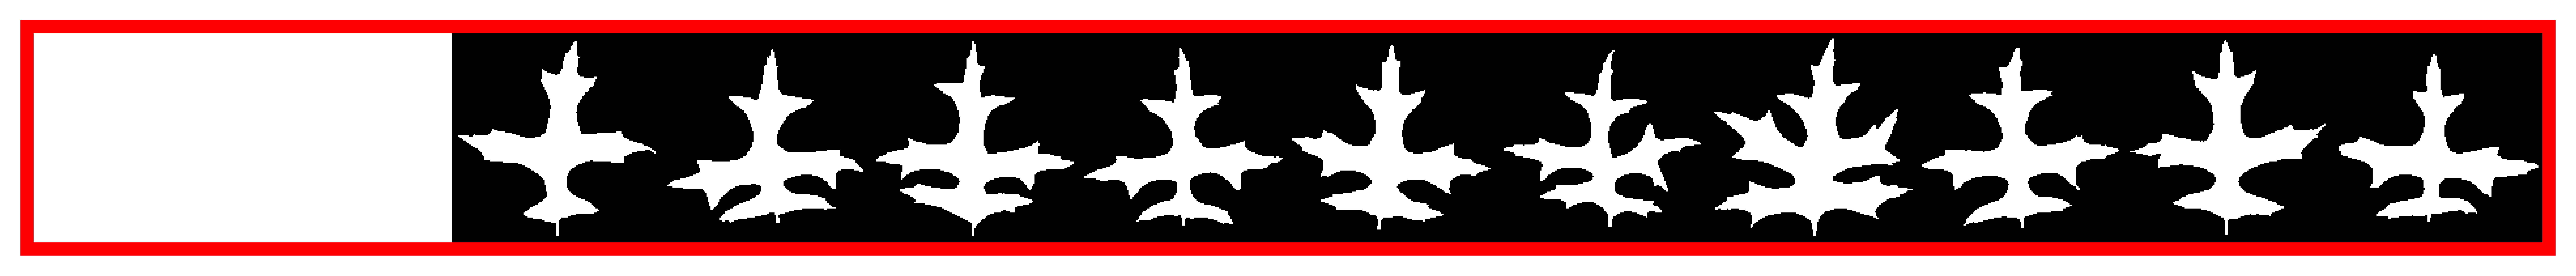

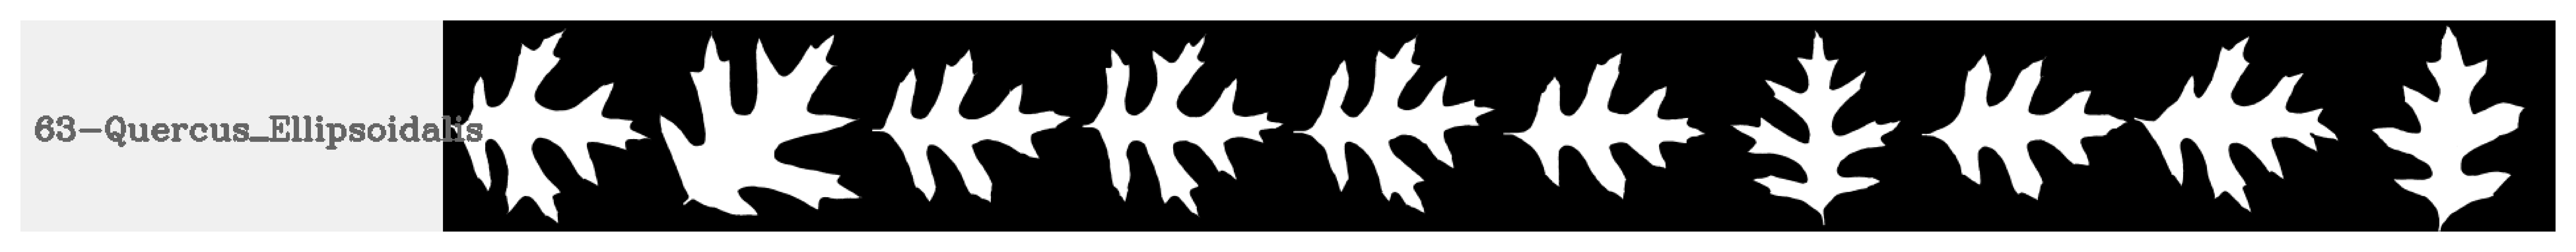

##################################################
Error index in the test set:  141
Ground truth species index: 46
Wrong predicting species index: 31


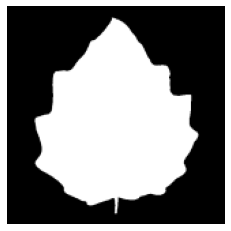

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


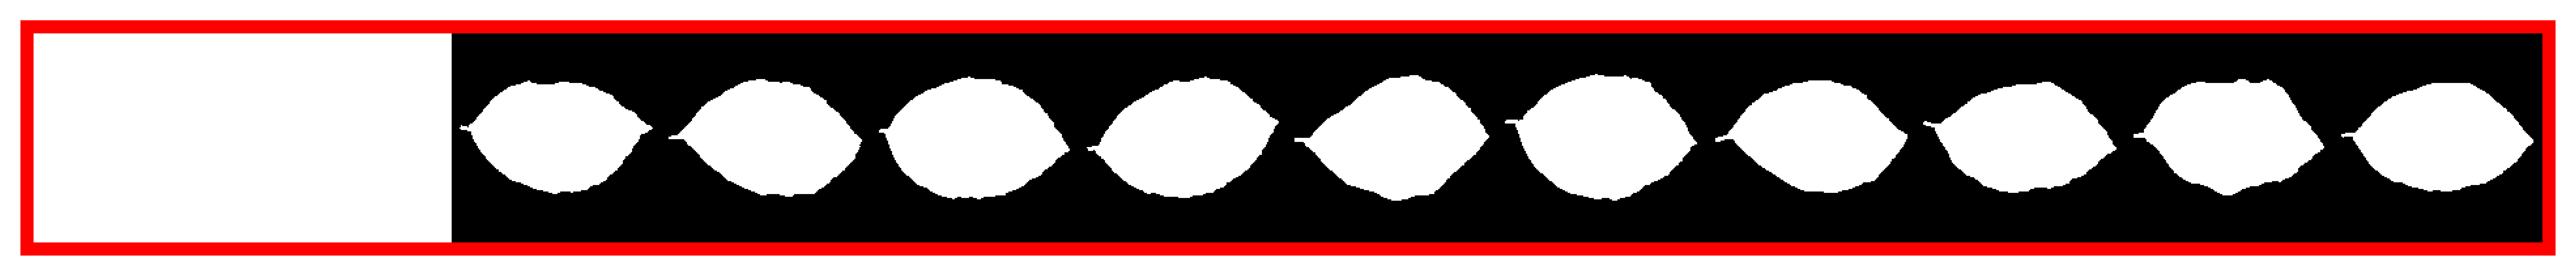

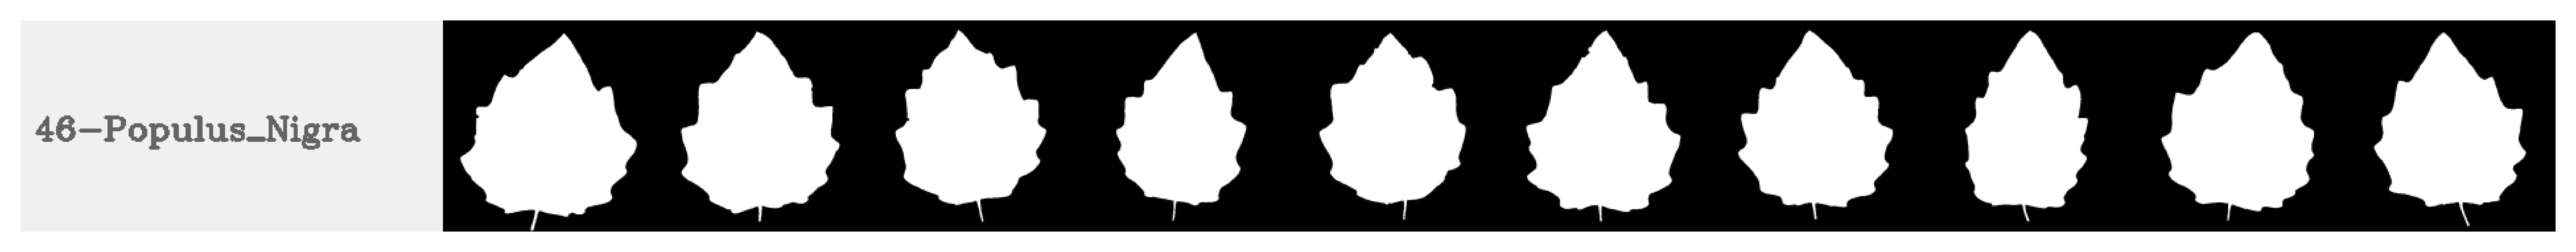

##################################################
Error index in the test set:  197
Ground truth species index: 15
Wrong predicting species index: 28


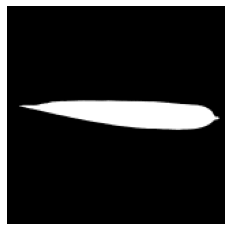

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


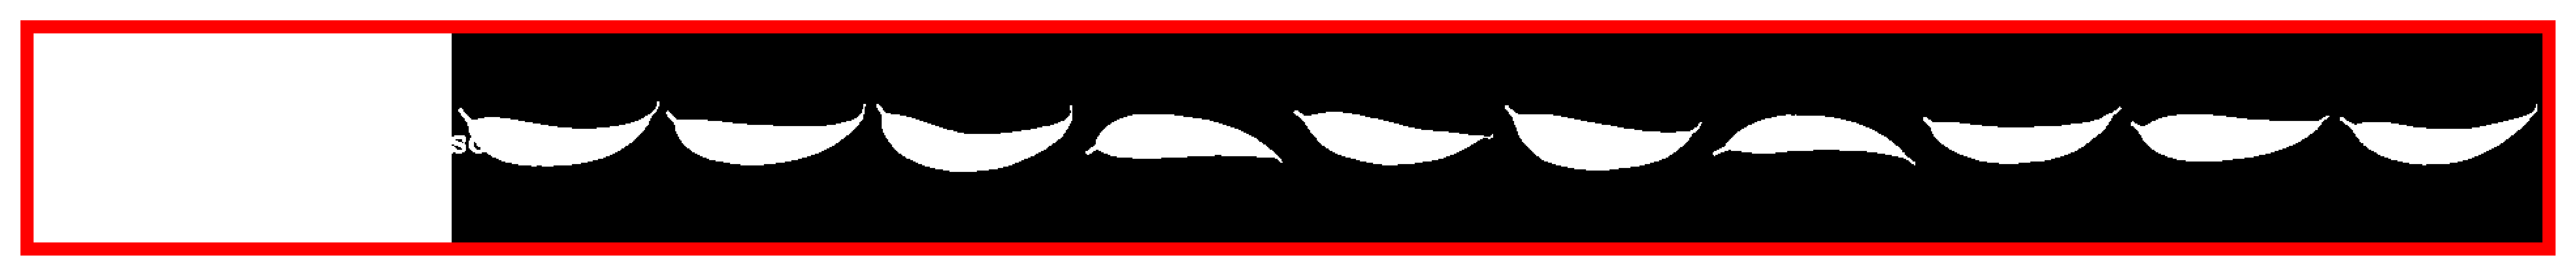

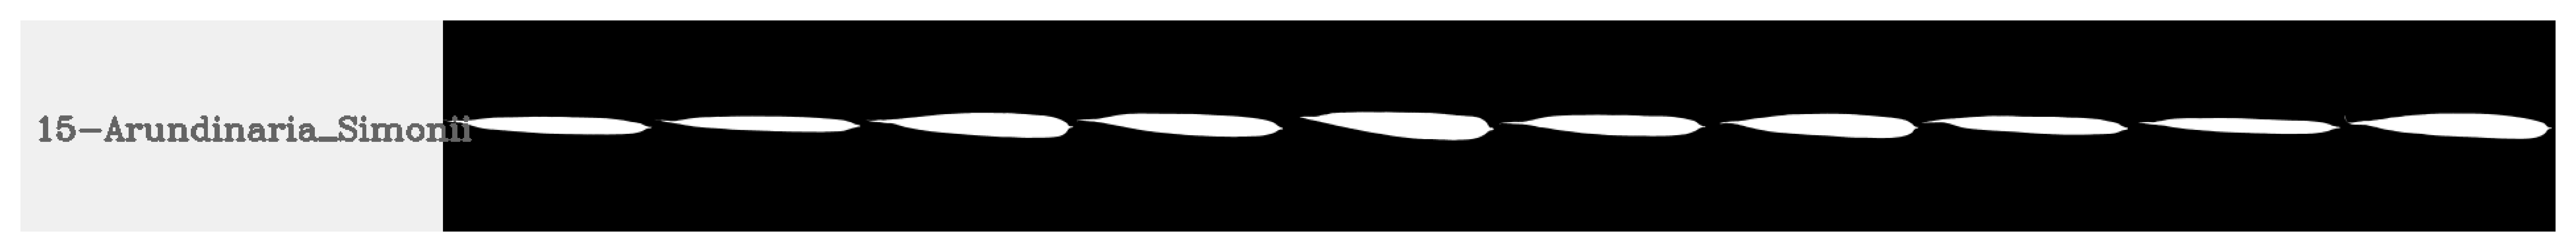

##################################################


In [99]:
visualize_error(train_predictions, y_test)

In [101]:
# Using the optimal parameters
param_grid = {'C': [1000],
              'tol': [0.000001]}
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
grid_search = GridSearchCV(log_reg, param_grid, scoring='neg_log_loss', refit='True', n_jobs=1, cv=ss_split)
grid_search.fit(X_train_scaled, y_train)

scaler = StandardScaler().fit(test)
test_scaled = scaler.transform(test)

test_predictions = grid_search.predict_proba(test_scaled)

# Format DataFrame
submission = pd.DataFrame(test_predictions, columns=classes)
submission.insert(0, 'id', test_ids)
submission.reset_index()

# Export Submission
submission.to_csv('submission_1208.csv', index = False)

# Double check the output
submission


,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,9.008097e-11,1.110584e-09,2.632219e-13,3.718094e-08,2.351455e-09,4.063981e-09,1.768679e-13,2.364643e-12,7.385467e-12,...,5.026214e-15,8.301153e-10,2.903995e-10,1.290910e-11,2.987093e-09,7.928798e-13,1.093420e-13,3.406081e-15,3.417027e-07,7.519102e-12
1,7,7.569297e-10,6.803171e-09,7.776687e-08,5.441846e-07,1.544828e-09,9.542752e-09,7.877028e-06,1.120653e-09,1.172293e-09,...,1.600117e-08,2.606607e-08,4.107950e-11,2.318063e-12,1.294021e-14,1.905992e-06,2.573908e-09,3.041939e-06,2.757650e-10,1.193171e-08
2,9,5.304593e-08,9.973272e-01,1.104433e-07,3.860394e-08,2.148054e-03,3.744219e-06,2.818644e-08,8.377355e-06,5.784910e-05,...,2.252602e-07,6.743000e-09,6.967223e-08,1.280439e-08,3.415495e-09,6.895476e-09,1.382422e-07,5.418709e-11,1.218445e-08,6.962669e-05
3,12,2.785218e-09,1.212940e-03,8.258966e-08,1.851041e-08,2.191432e-07,3.167092e-09,8.428606e-06,2.894910e-07,6.235043e-06,...,5.253256e-07,7.977710e-09,7.651997e-08,5.446705e-10,2.526223e-10,7.761374e-07,5.167816e-04,2.915569e-08,4.291717e-09,7.708803e-05
4,13,5.941095e-08,5.113922e-08,1.420759e-10,1.702124e-11,2.944494e-08,1.402785e-10,5.363958e-08,7.859582e-09,3.746946e-06,...,2.472203e-08,9.548095e-11,4.751347e-07,3.630293e-10,5.300839e-07,2.563012e-07,3.842874e-06,9.349858e-10,1.240148e-08,9.273628e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,2.781513e-07,9.996992e-01,5.083472e-07,8.757929e-09,1.356085e-04,1.453318e-07,6.601559e-09,1.257579e-06,6.079298e-06,...,5.115300e-08,1.214739e-08,6.483187e-08,3.026965e-09,1.905079e-10,4.323082e-09,2.891769e-07,4.244031e-11,7.597413e-09,3.816454e-05
590,1577,2.991327e-07,5.791561e-07,5.899262e-09,7.022894e-07,6.433670e-08,2.414080e-09,7.858645e-08,2.661000e-05,1.649460e-04,...,2.902624e-08,7.698202e-09,2.401179e-05,3.827213e-09,1.336011e-05,2.322290e-05,5.396330e-07,1.883990e-10,1.128777e-08,8.444227e-05
591,1579,8.502667e-09,5.015367e-08,2.704779e-09,5.169284e-11,2.566106e-07,3.585288e-07,9.885295e-11,7.438901e-09,3.517211e-09,...,9.195496e-13,3.814033e-12,2.384737e-08,2.071586e-09,2.649931e-09,2.406065e-14,3.719256e-12,3.764587e-11,5.986880e-09,2.294934e-07
592,1580,2.776080e-09,4.350186e-09,3.221547e-07,1.737270e-07,1.509132e-07,1.472746e-09,5.138934e-07,1.520516e-06,5.541444e-10,...,2.600653e-07,6.523114e-06,7.646386e-11,1.429084e-06,3.886816e-12,5.854058e-08,1.624814e-09,4.022514e-09,1.285408e-10,1.857050e-09
